### Experiment 10 

Design and implement Convolutional Neural Network

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

2025-11-13 10:03:17.610832: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-13 10:03:18.432536: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-13 10:03:22.338108: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Paths to the dataset folders
train_dir = '/home/aditya/ml_lab_IT2718/datasets/dog_cat_images/dataset/training_set'
test_dir = '/home/aditya/ml_lab_IT2718/datasets/dog_cat_images/dataset/test_set'

In [3]:
# Image parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [4]:
# Data generators with basic rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.


In [6]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [7]:
# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

/home/aditya/ml_lab_IT2718/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-13 10:08:44.065605: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


# Save the model if needed
model.save('cats_vs_dogs_model.h5')

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 556ms/step - accuracy: 0.5763 - loss: 0.6749 - val_accuracy: 0.6490 - val_loss: 0.6185
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 140s 562ms/step - accuracy: 0.7101 - loss: 0.5592 - val_accuracy: 0.7495 - val_loss: 0.5205
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 131s 525ms/step - accuracy: 0.7629 - loss: 0.4869 - val_accuracy: 0.7390 - val_loss: 0.5250
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 136s 545ms/step - accuracy: 0.7919 - loss: 0.4429 - val_accuracy: 0.7530 - val_loss: 0.4981
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 530ms/step - accuracy: 0.8324 - loss: 0.3761 - val_accuracy: 0.7710 - val_loss: 0.5072
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 137s 547ms/step - accuracy: 0.8717 - loss: 0.2901 - val_accuracy: 0.7820 - val_loss: 0.5572
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 136s 543ms/step - accuracy: 0.9202 - loss: 0.1928 - val_accuracy: 0.7780 - val_loss: 0.6196
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 135s 541ms/step - accuracy: 0.9663 -


 Test Accuracy: 78.60%
Test Loss: 1.1517


In [10]:
import matplotlib.pyplot as plt

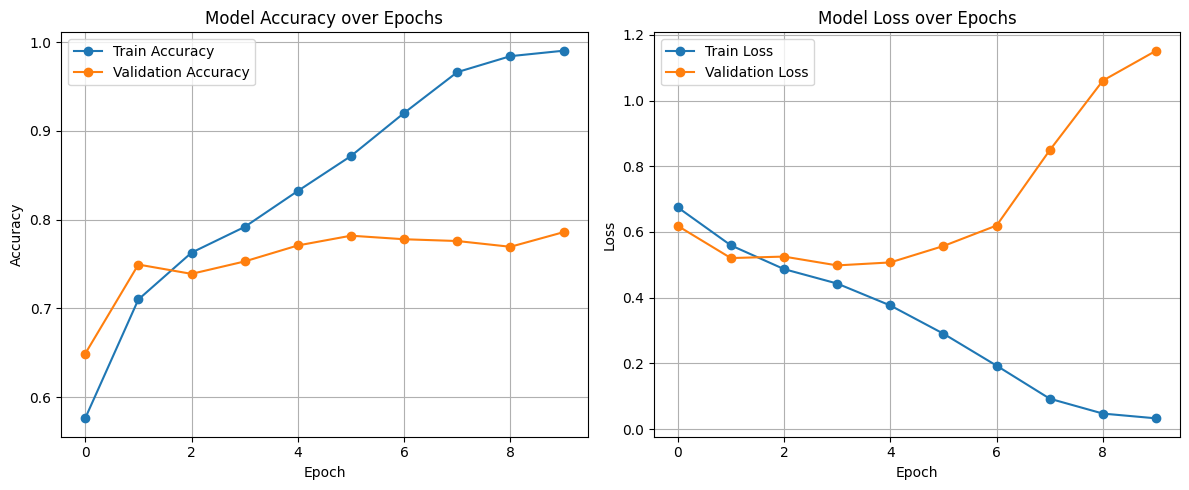

In [11]:
plt.figure(figsize=(12, 5))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
